# GRADIANCE GUIA 1

In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

## Luego de analizar los datos publicados en: https://www.kaggle.com/NUFORC/ufo-sightings Indicar cuál de las siguientes afirmaciones es correcta

Antes de continuar, bajar el ```ufo-sightings.zip``` de kaggle y descomprimirlo dentro de la carpeta ```ufo-sightings/```.

In [2]:
#complete = pd.read_csv('ufo-sightings/complete.csv', low_memory=False)
scrubbed = pd.read_csv('ufo-sightings/scrubbed.csv', low_memory=False)
scrubbed.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
scrubbed.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

El avistaje de mayor duración en segundos se registro en Canadá. <b>FALSO</b>

In [4]:
scrubbed.loc[:,'duration (seconds)'] = scrubbed['duration (seconds)'].apply(lambda x: x.replace('`','')).apply(lambda x: float(x))
scrubbed.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)      float64
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [5]:
cities_duration = scrubbed[['country','duration (seconds)']]
cities_duration.head()

,country,duration (seconds)
0,us,2700.0
1,NaN,7200.0
2,gb,20.0
3,us,20.0
4,us,900.0


In [6]:
ordered_cities_duration = cities_duration.sort_values(by='duration (seconds)',ascending=False).head(10)
ordered_cities_duration.head()

,country,duration (seconds)
559,gb,97836000.0
53384,ca,82800000.0
74660,us,66276000.0
64390,us,52623200.0
38261,NaN,52623200.0


El promedio de duración de los ufos con formas cambiantes es superior al resto. <b>FALSO</b>

In [7]:
#duration_byshape = scrubbed.loc[:,['duration (seconds)','shape']].groupby('shape')#.agg(np.mean,np.size)
#duration_byshape
scrubbed_frame = pd.DataFrame(scrubbed)
#scrubbed_frame.loc[:,['shape','duration (seconds)']].groupby('shape').describe()
duration_byshape = scrubbed_frame.loc[:,['shape','duration (seconds)']].groupby('shape').agg(np.mean)
duration_byshape.head()

,duration (seconds)
shape,
changed,3600.000000
changing,2079.513405
chevron,460.317174
cigar,1917.106830
circle,4767.466062


El tercer estado con mas avistajes de ovnis es Texas. <b>FALSO</b>

In [8]:
scrubbed_frame['state'].value_counts().head(5)

ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
Name: state, dtype: int64

El país con avistajes de mayor duración promedio es Gran Bretaña <b>VERDADERO</b>

In [9]:
durationmean_bycountry = scrubbed_frame.loc[:,['country','duration (seconds)']].groupby('country').agg(np.mean)
durationmean_bycountry
#scrubbed_frame.loc[:,['country','duration (seconds)']].groupby('country').describe()

,duration (seconds)
country,
au,3806.469238
ca,28859.437007
de,24255.980952
gb,66061.321207
us,5800.014047


## Luego de analizar los datos publicados en: https://www.kaggle.com/uciml/student-alcohol-consumption Indicar cuál de las siguientes afirmaciones es correcta:

Antes de continuar, bajar el ```student-alcohol-consumption.zip``` de kaggle y descomprimirlo dentro de la carpeta ```student-alcohol-consumption/```.

In [155]:
students_mat = pd.read_csv('student-alcohol-consumption/student-mat.csv', low_memory=False)
students_por = pd.read_csv('student-alcohol-consumption/student-por.csv', low_memory=False)
#students_mat.describe()
students_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

Los alumnos de Matemática que eligieron el colegio en función de la cercanía a su hogar tienen mejor promedio de calificación, que los alumnos de Portugués que eligieron el establecimiento con igual criterio <b>FALSO</b>

In [23]:
students_mat[students_mat['reason'] == 'home'].loc[:,['reason','G3']].groupby('reason').agg(np.mean)

,G3
reason,
home,10.256881


In [25]:
students_por[students_por['reason'] == 'home'].loc[:,['reason','G3']].groupby('reason').agg(np.mean)

,G3
reason,
home,12.181208


Realizando un histograma de notas finales, se puede observar que existen mas notas entre 12 y 14 que entre 10 y 12. <b>FALSO</b>

In [26]:
students_mat.columns.values

array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'G2', 'G3'], dtype=object)

In [156]:
students_merge = pd.merge(students_mat, students_por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1',
       'G2', 'G3'], how='outer')
students_merge

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


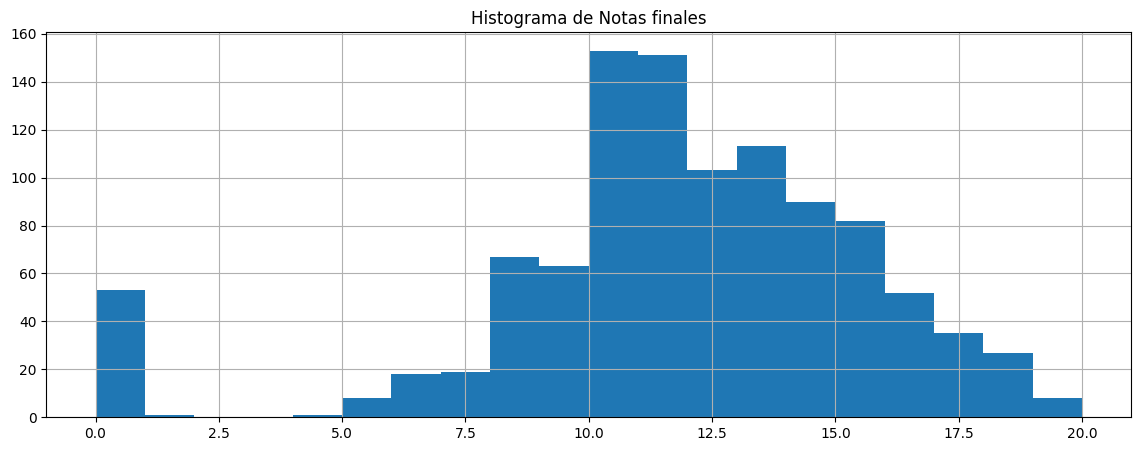

In [147]:
plt.figure()
plt.title('Histograma de Notas finales', color='black')
students_merge['G3'].hist(bins=20,figsize=(14,5));

Los alumnos que eligieron el establecimiento en base a su reputación tienen mejor promedio de notas que los que concurren al mismo por cercanía a su domicilio <b>VERDADERO</b>

In [41]:
students_merge[students_merge['reason'] == 'reputation'].loc[:,['reason','G3']].groupby('reason').agg(np.mean)

,G3
reason,
reputation,12.181452


In [42]:
students_merge[students_merge['reason'] == 'home'].loc[:,['reason','G3']].groupby('reason').agg(np.mean)

,G3
reason,
home,11.368217


Existen mas alumnos de Portugués en la escuela Mousinho da Silveira que en la Gabriel Pereira. <b>FALSO</b>

In [47]:
students_por[students_por['school']=='MS'].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,16.889381,2.119469,1.991150,1.827434,1.774336,0.314159,3.889381,3.230088,3.256637,1.561947,2.305310,3.420354,2.619469,10.300885,10.495575,10.650442
std,1.155152,1.134851,1.037052,0.760906,0.787376,0.655556,1.067155,1.162441,1.216763,0.969840,1.257747,1.489320,3.130690,2.979590,3.376057,3.833991
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,10.000000,10.000000,11.000000
75%,18.000000,3.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,4.000000,12.000000,12.750000,13.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,19.000000,18.000000,19.000000


In [48]:
students_por[students_por['school']=='GP'].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,16.666667,2.725768,2.475177,1.430260,2.014184,0.172577,3.952719,3.153664,3.146572,1.470449,2.267139,3.598109,4.215130,11.985816,12.144208,12.576832
std,1.244895,1.077769,1.096623,0.704913,0.840214,0.551607,0.891049,0.986895,1.152899,0.899421,1.299666,1.420632,5.191915,2.418293,2.451522,2.625636
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,6.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,10.000000,11.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,19.000000,19.000000


## Luego de analizar los datos publicados en: https://www.kaggle.com/NUFORC/ufo-sightings Indicar cuál de las siguientes afirmaciones es correcta:

Ya poseemos cargado el ```ufo-sightings``` dentro de la variable ```scrubbed```

In [49]:
scrubbed.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


La forma con mayor cantidad de registros en Los Angeles, CA es la forma de triangulo. <b>FALSO<b/>

In [76]:
scrubbed.loc[(scrubbed['state'] == 'ca') & (scrubbed['city'] =='los angeles'),['shape','datetime']].groupby('shape').agg(np.size)

,datetime
shape,
changing,13
chevron,5
cigar,16
circle,36
cone,3
cylinder,1
diamond,4
disk,29
egg,5


Existen mas reportes de ufos en forma de cruz que de diamante. <b>FALSO<b/>

Existen 2184 registros de avistajes en Estados Unidos durante el año 2000. <b>VERDADERO<b/>

In [89]:
scrubbed.loc[(scrubbed['country'] == 'us') & (scrubbed['datetime'].str.contains('2000')),:].count()

datetime                2184
city                    2184
state                   2184
country                 2184
shape                   2149
duration (seconds)      2184
duration (hours/min)    2184
comments                2184
date posted             2184
latitude                2184
longitude               2184
dtype: int64

Existen 143 registros de avistajes en Canadá durante el año 2010 <b>FALSO<b/>

In [88]:
scrubbed.loc[(scrubbed['country'] == 'ca') & (scrubbed['datetime'].str.contains('2010')),:].count()

datetime                137
city                    137
state                   137
country                 137
shape                   136
duration (seconds)      137
duration (hours/min)    137
comments                137
date posted             137
latitude                137
longitude               137
dtype: int64

## 	Luego de analizar los datos publicados en: https://www.kaggle.com/uciml/student-alcohol-consumption Indicar cuál de las siguientes afirmaciones es correcta:

Ya poseemos cargado el ```student-alcohol-consumption``` dentro de las variables ```students_mat``` y ```students_por```

In [91]:
students_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

Los alumnos con ambos padres en la casa tienen mejor desempeño que los padres que tienen un padre trabajando. <b>FALSO</b>

In [109]:
students_merge.loc[(students_merge['Mjob']=='at_home') & (students_merge['Fjob']=='at_home'),['G1','G2','G3']].apply(lambda x: (x[0]+x[1]+x[2])/3, axis=1).agg(np.mean)
#.apply(lambda x: (x[0]+x[1]+x[2])/3)

12.000000000000002

In [111]:
students_merge.loc[(students_merge['Mjob']=='at_home') != (students_merge['Fjob']=='at_home'),['G1','G2','G3']].apply(lambda x: (x[0]+x[1]+x[2])/3, axis=1).agg(np.mean)

10.186084142394821

Existe una dependencia entre las notas obtenidas y la cantidad de aplazos previos <b>VERDADERO</b>

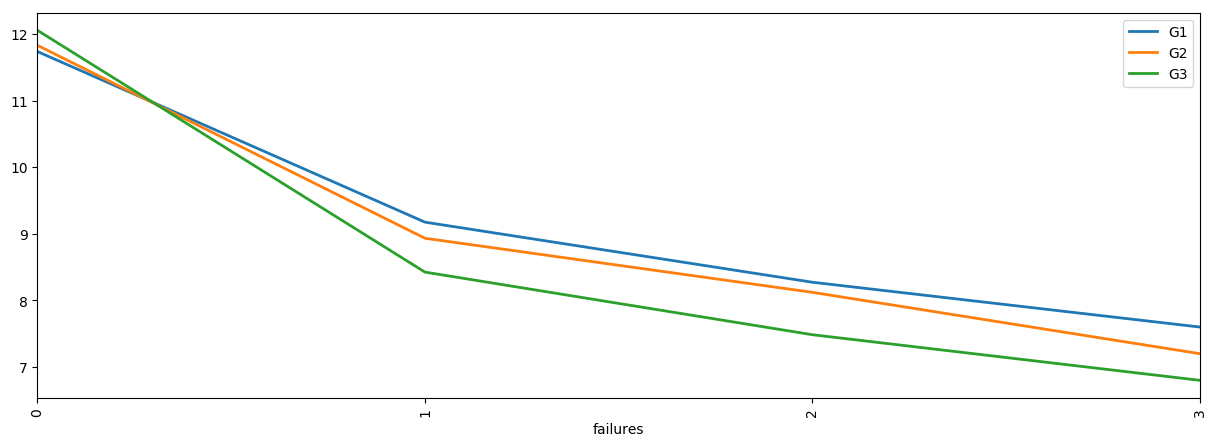

In [174]:
plt.figure()
students_merge.loc[:,['failures','G1','G2','G3']].groupby('failures').mean().plot(rot=90,xticks=range(0,4),  \
                 linewidth=2,label='Notas');
plt.legend();

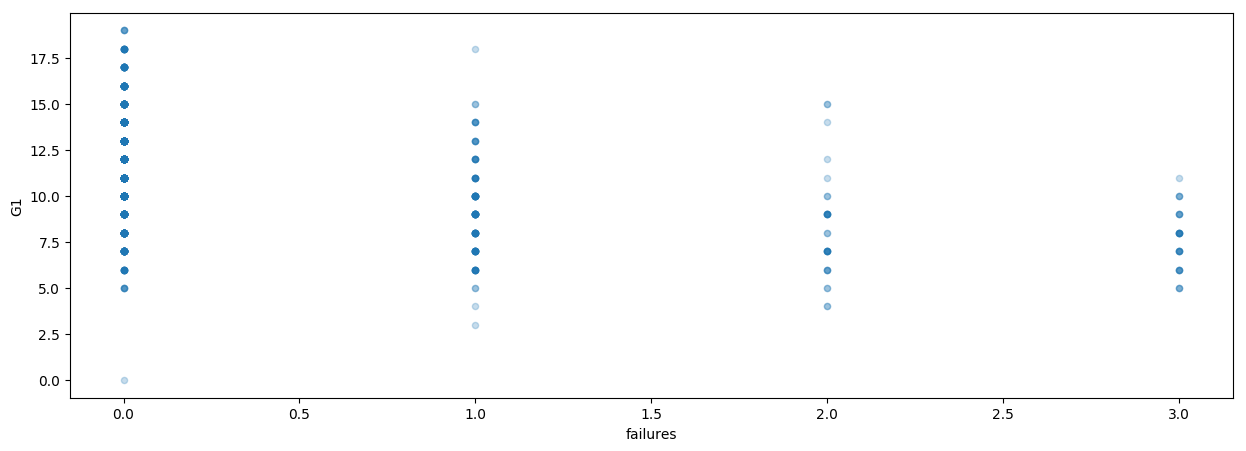

In [175]:
students_merge.plot.scatter('failures','G1',alpha=0.25);

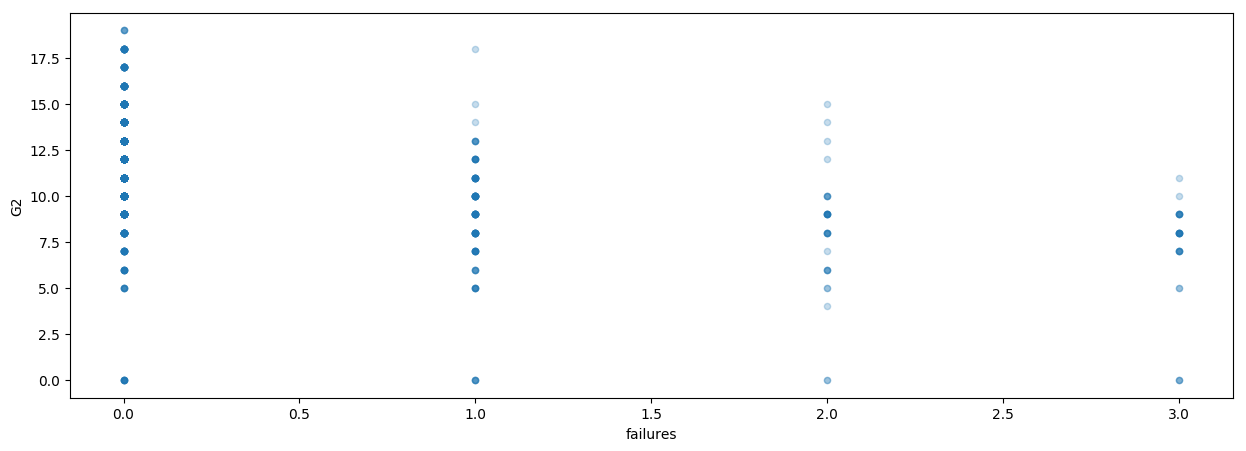

In [176]:
students_merge.plot.scatter('failures','G2',alpha=0.25);

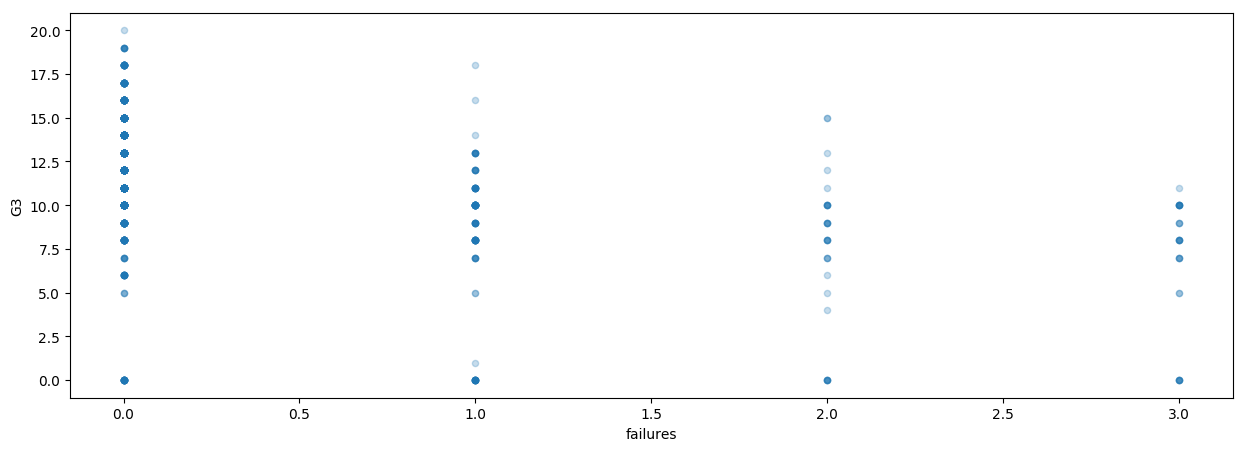

In [178]:
students_merge.plot.scatter('failures','G3',alpha=0.25);

Las aspiraciones a futuro o plan de carrera no influyen en el nivel de consumo de alcohol <b>FALSO</b>

In [167]:
#students_merge[['higher','Dalc','Walc']].groupby('higher').plot.box(figsize=(15,5));
#students_merge['higher'] = students_merge['higher'] == 'yes'
#students_merge['higher'].apply(lambda x: x == 'yes',)
students_merge[['higher','Dalc','Walc']].groupby('higher').describe()

Dalc                                                Walc            \
        count      mean       std  min  25%  50%  75%  max  count      mean   
higher                                                                        
no       89.0  1.831461  1.150454  1.0  1.0  1.0  2.0  5.0   89.0  2.651685   
yes     955.0  1.462827  0.880389  1.0  1.0  1.0  2.0  5.0  955.0  2.250262   

                                           
             std  min  25%  50%  75%  max  
higher                                     
no      1.470166  1.0  1.0  3.0  4.0  5.0  
yes     1.261919  1.0  1.0  2.0  3.0  5.0

La mayoría de las familias tienen hasta 3 miembros <b>FALSO</b>

In [179]:
students_merge.groupby('famsize').count()

,school,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
famsize,,,,,,,,,,,,,,,,,,,,,
GT3,738,738,738,738,738,738,738,738,738,738,...,738,738,738,738,738,738,738,738,738,738
LE3,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306
